# Pandas with Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Familiarizing with datetime object

In [2]:
from datetime import datetime

In [4]:
my_year = 2017
my_month = 10
my_day = 2
my_hour = 3
my_minute = 4
my_second= 15

In [5]:
my_date = datetime(my_year, my_month, my_day)

In [6]:
my_date

datetime.datetime(2017, 10, 2, 0, 0)

In [7]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)

In [8]:
my_date_time

datetime.datetime(2017, 10, 2, 3, 4, 15)

In [9]:
type(my_date_time)

datetime.datetime

In [12]:
# attributes of datetime object
my_date_time.day

2

In [13]:
my_date_time.month

10

### Creating datetime index from datetime list

In [26]:
first_two=[datetime(2016,1,1), datetime(2016,1,2)]
first_two

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 2, 0, 0)]

In [27]:
dt_ind = pd.DatetimeIndex(first_two)
dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [28]:
data = np.random.randn(2,2)
data

array([[-1.56057147,  0.16174233],
       [ 0.4711601 ,  0.27909624]])

In [29]:
cols = ['a', 'b']
cols

['a', 'b']

In [30]:
df = pd.DataFrame(data, dt_ind, cols)
df

,a,b
2016-01-01,-1.560571,0.161742
2016-01-02,0.471160,0.279096


In [31]:
df.index.argmax()

1

In [32]:
df.index.max()

Timestamp('2016-01-02 00:00:00')

In [33]:
df.index.argmin()

0

In [34]:
df.index.min()

Timestamp('2016-01-01 00:00:00')

# Pandas with Time Series continued... 2
# Time resampling

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# or use index_col='Date', parse_dates=True
df = pd.read_csv('time_data/walmart_stock.csv') 
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [39]:
# converting regular string column to datetime column
df['Date'] = pd.to_datetime(df['Date'])  # use the format='' argument for reading different formats
df.info()

# or use df['Date'] = df['Date'].apply(pd.to_datetime)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null datetime64[ns]
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [41]:
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
2012-01-10,59.430000,59.709999,58.980000,59.040001,6907300,51.494109
2012-01-11,59.060001,59.529999,59.040001,59.400002,6365600,51.808098
2012-01-12,59.790001,60.000000,59.400002,59.500000,7236400,51.895316
2012-01-13,59.180000,59.610001,59.009998,59.540001,7729300,51.930204


In [43]:
# Time resampling requires datetime index
# Resampling rules mentioned 
# @ http://benalexkeen.com/resampling-time-series-data-with-pandas/
df.resample(rule='A')  # group by method specific to datetime objects

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

### Applying pre-defined functions to time sampler

In [44]:
df.resample(rule='A').mean()   # mean by Year end

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [45]:
df.resample(rule='A').max()   # max by Year end

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,77.599998,77.599998,76.690002,77.150002,38007300,68.568371
2013-12-31,81.209999,81.370003,80.820000,81.209999,25683700,73.929868
2014-12-31,87.080002,88.089996,86.480003,87.540001,22812400,81.707680
2015-12-31,90.800003,90.970001,89.250000,90.470001,80898100,84.914216
2016-12-31,74.500000,75.190002,73.629997,74.300003,35076700,73.233524


### Applying custom functions to time sampler

In [46]:
def first_day(entry):  # exepected entry as pandas.series
    return entry[0]
df.resample('A').apply(first_day)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


### Visualizations with resampler

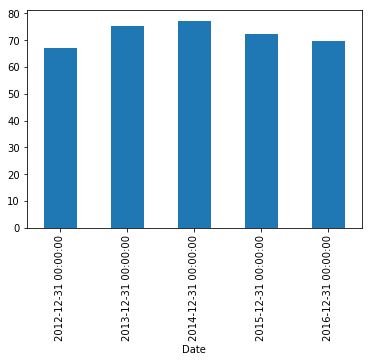

In [51]:
# resampling by Year
df['Close'].resample('A').mean().plot(kind='bar')   

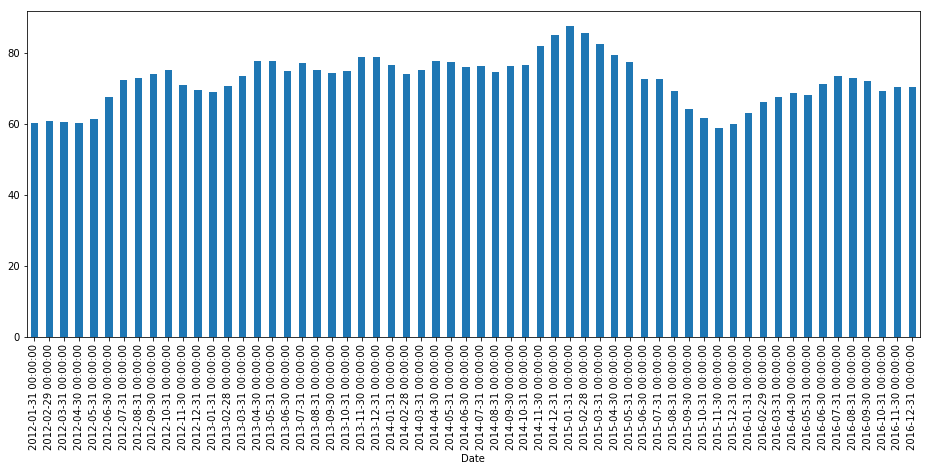

In [52]:
# resampling by Month
df['Close'].resample('M').mean().plot(kind='bar', figsize=(16,6))   


# Pandas with Time Series continued... 3
# Time shifts

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('time_data/walmart_stock.csv',index_col='Date',parse_dates=True) 
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [58]:
# Shifting data position up by one index
df.shift(periods = 1).head()   # periods = 1 (shift by 1 row)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [59]:
# Shifting data position down by one index
df.shift(periods = -1).head()   # periods = -1 (shift by 1 row)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-04,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-05,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220
2012-01-06,59.029999,59.549999,58.919998,59.180000,6679300.0,51.616215
2012-01-09,59.430000,59.709999,58.980000,59.040001,6907300.0,51.494109


### TShift
This will shift the index itself based on the frequency defined by the timestring code

In [60]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [62]:
df.tshift(freq='M').head()   # Index shifted by month

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


# Pandas with Time Series continued... 4
# Pandas rolling and expanding

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('time_data/walmart_stock.csv',index_col='Date',parse_dates=True) 
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


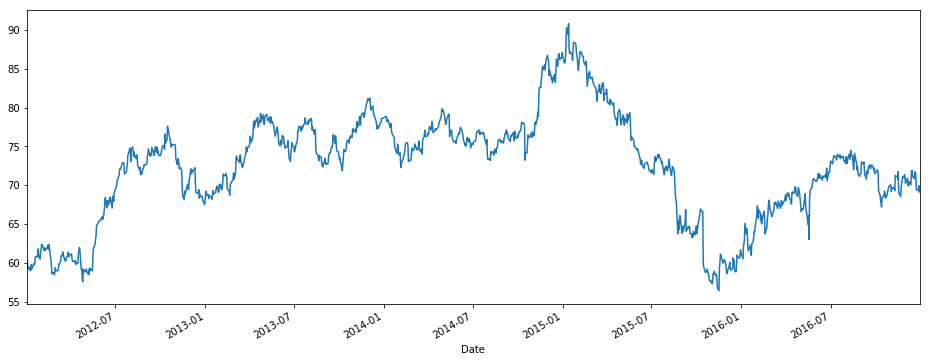

In [64]:
df['Open'].plot(figsize=(16,6))

In [66]:
# Obtaining moving average (rolling mean) of period = 7
df.rolling(window=7).mean().head(14)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


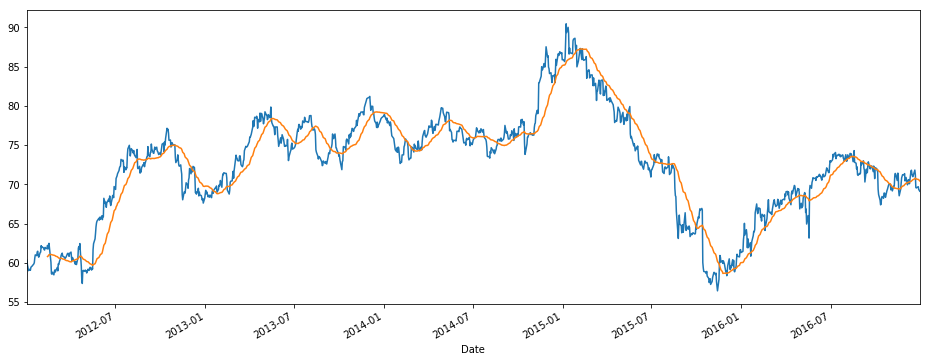

In [71]:
# Plotting a 30-day moving average on dataset
df['Close'].plot()
df.rolling(window=30).mean()['Close'].plot(figsize=(16,6))

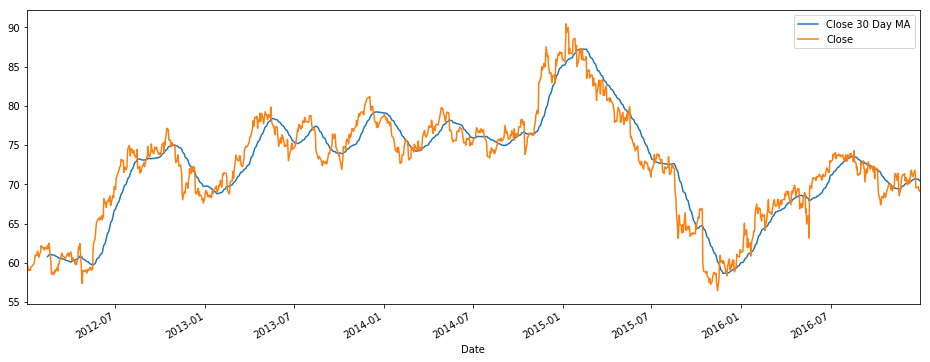

In [73]:
df['Close 30 Day MA'] = df['Close'].rolling(window=30).mean()
df[['Close 30 Day MA', 'Close']].plot(figsize=(16,6))

### Expanding shows average (mean) of all the datapoints that came before that datapoint.

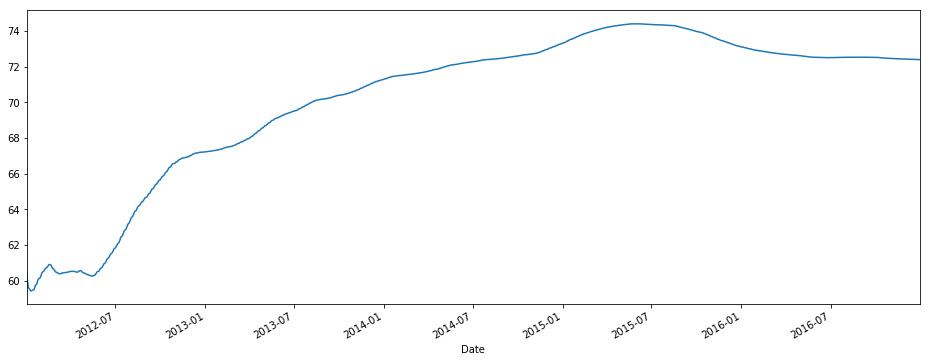

In [74]:
df['Close'].expanding().mean().plot(figsize=(16,6))

# Bollinger Bands

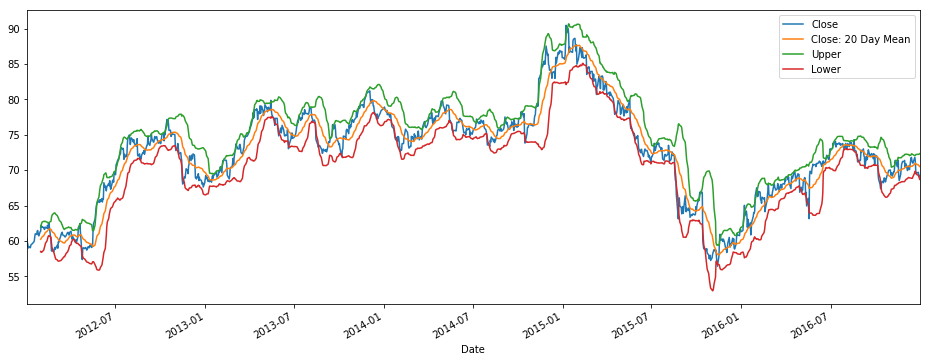

In [75]:
# Close 20 MA
# Upperband = 20MA + 2*std(20)
# Lowerband = 20MA - 2*std(20)
# Close

# adding new columns to dataframe
df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()
df['Upper'] = df['Close: 20 Day Mean'] + 2 * (df['Close'].rolling(20).std())
df['Lower'] = df['Close: 20 Day Mean'] - 2 * (df['Close'].rolling(20).std())

df[['Close', 'Close: 20 Day Mean', 'Upper', 'Lower']].plot(figsize=(16,6))


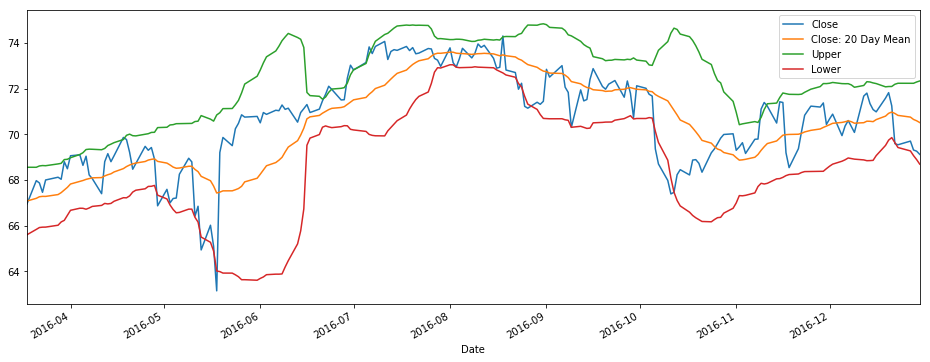

In [76]:
df[['Close', 'Close: 20 Day Mean', 'Upper', 'Lower']].tail(200).plot(figsize=(16,6))